# El helecho de Barsnsley

El helecho de Barsnsley es el resultado de iterar la siguiente función

\begin{equation}
   F(x,y)=\begin{pmatrix} 
a & b \\
c & d 
\end{pmatrix}
\begin{pmatrix} 
x  \\
y  
\end{pmatrix} + \begin{pmatrix} 
e \\
f
\end{pmatrix}
\end{equation}

La cual está definida por casos, y estos dependen de un probalidad $p$
 
| $a$ | $b$ |  $c$ | $d$ | $e$ | $f$ |  $p$  |
|-----|:---:|-----:|-----|:---:|----:|------:|
|  0  |  0  |   0  | 0.16|  0  |  0  |  $0.01$ |
| 0.85| 0.04| -0.04| 0.85|  0  | 1.60|$[0.02,0.86]$|
| 0.20|-0.26| 0.23 | 0.22|  0  | 1.60|$[0.87,0.93]$|
|-0.15| 0.28| 0.26 | 0.24|  0  | 0.44|$[0.94,1.00]$|

Usando el objeto ```matrix``` de ```numpy``` defina una función llamada ```F(lista1, lista2)``` que reciba justo dos argumentos, el primer debe ser una lista con los variables $x$ y $y$. Y el segundo argumento debe ser una seguda lista con los coeficientes ($a, b, \dots , e$).

La funcion ```F()``` debe de convertir las repesctivas entradas para que se puedan realizar las respectivas operaciones de matrices.

In [1]:
import numpy as np
from random import *

In [ ]:
R = np.array([1, 2, 3, 4, 5, 6])

In [ ]:
A = np.matrix(R[:4].reshape(2, 2))

In [ ]:
A

matrix([[1, 2],
        [3, 4]])

In [ ]:
V = np.matrix(R[4:].reshape(2,1))

In [ ]:
V

matrix([[5],
        [6]])

In [ ]:
A*V

matrix([[17],
        [39]])

In [2]:
def F(lista1, lista2):
    """lista1 es de la forma array([x, y])
       lista2 es de la forma array([a,b,c,d,e,f])"""
    
    X = np.matrix(lista1.reshape(2,1))
    M = np.matrix(lista2[:4].reshape(2, 2))
    V = np.matrix(lista2[4:].reshape(2,1))
    
    return M*X + V

In [ ]:
F(np.array([1, 0]), np.array([1, 2, 3, 4, 5, 6]))

matrix([[6],
        [9]])

Codifique una segunda función llamada ```volado(n)``` de tal manera que asigne los repectivo valores de los coeficientes para casa valor de $p$. 

La cual está definida por casos, y estos dependen de un probalidad $p$
 
| $a$ | $b$ |  $c$ | $d$ | $e$ | $f$ |  $p$  |
|-----|:---:|-----:|-----|:---:|----:|------:|
|  0  |  0  |   0  | 0.16|  0  |  0  |  $0.01$ |
| 0.85| 0.04| -0.04| 0.85|  0  | 1.60|$[0.02,0.86]$|
| 0.20|-0.26| 0.23 | 0.22|  0  | 1.60|$[0.87,0.93]$|
|-0.15| 0.28| 0.26 | 0.24|  0  | 0.44|$[0.94,1.00]$|

In [3]:
def volado(n):
  for i in range(n):
    coef = np.zeros(5)
    p = np.random.rand()
    #p = random.random()
    if p <= 0.01:
      coef = np.array([0,0,0,0.16,0,0])
    elif p >= 0.02 and p<=0.86:
      coef = np.array ([0.85,0.04,-0.04,0.85,0,1.6])  
    elif p >= 0.87 and p<=0.93:
      coef = np.array([0.2,-0.26,0.23,0.22,0,1.6])
    else:
      coef = np.array([-0.15,0.28,0.26,0.24,0,0.44])
  return coef

In [ ]:
c = volado(56)
print(c)

[ 0.85  0.04 -0.04  0.85  0.    1.6 ]


Por último para generar el helecho, defina una función ```Barsnsley(n)``` que reciba el número de iteraciones $n$ y regrese dos lista con salidas de la función $F(x,y)$. También tome en cuenta los siguiente:

* La primer iteración debe de recibir como entrada de $F(x,y)$ el punto $x=0$ y $y=0$.
* En cada iteración de debe generar los coefientes de manera aleatoria, usando la función ```volado(n)```, es decir ```n``` debe ser un numero aleatorio. Para generar números aleatorios puede importar ```randint``` de la paquetería ramdom ```from random import randint``` o usar ```np.random.rand()``` de numpy

In [4]:
def Barsnley(n):
  x=0
  y=0
  X = []
  Y = []
  for r in range(n):
    m = randint(1,n)
    coeffs = volado(m)
    mXY = F(np.array([x,y]),coeffs)
    x = mXY[0,0]
    y = mXY[1,0]
    X.append(x)
    Y.append(y)
  return X,Y


Ahora grafique las salidas de ```Barsnsley``` (xs,ys) para ello importe ```import matplotlib.pyplot as plt``` y grafique usando.
```plt.scatter(xs, ys, s = 0.2, edgecolor ='green')```

El resultado tiene que la siguiente imagen

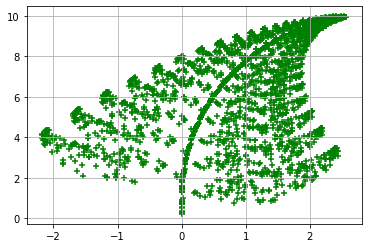

In [5]:
import matplotlib.pyplot as plt
X, Y = Barsnley(2000)
plt.scatter(X,Y,marker='+', color='g')
plt.grid()
plt.show()

¿Qué pasa si ahora usa los siguientes parametros?
 
| $a$ | $b$ |  $c$ | $d$ |  $e$ | $f$ |  $p$  |
|-----|:---:|-----:|-----|:----:|----:|------:|
|  0  |  0  |   0  | 0.25|  0   |-0.4 |$[0.00,0.02]$|
| 0.95|0.005|-0.005| 0.93|-0.002| 0.5 |$[0.03,0.85]$|
|0.035| -0.2| 0.16 | 0.04| -0.09| 0.02|$[0.86,0.93]$|
|-0.04| 0.2 | 0.16 | 0.04|-0.083| 0.12|$[0.94,1.00]$|

In [6]:
def volado2(n):
  for i in range(n):
    coef = np.zeros(5)
    p = np.random.rand()
    #p = random.random()
    if p <= 0.02:
      coef = np.array([0,0,0,0.25,0,-0.4])
    elif p >= 0.03 and p<=0.85:
      coef = np.array ([0.95,0.005,-0.005,0.93,-0.002,0.5])  
    elif p >= 0.86 and p<=0.93:
      coef = np.array([0.035,-0.2,0.16,0.04,-0.09,0.02])
    else:
      coef = np.array([-0.04,0.2,0.16,0.04,-0.083,0.12])
  return coef

In [7]:
def Barsnley2(n):
  x=0
  y=0
  X = []
  Y = []
  for r in range(n):
    m = randint(1,n)
    coeffs = volado2(m)
    mXY = F(np.array([x,y]),coeffs)
    x = mXY[0,0]
    y = mXY[1,0]
    X.append(x)
    Y.append(y)
  return X,Y

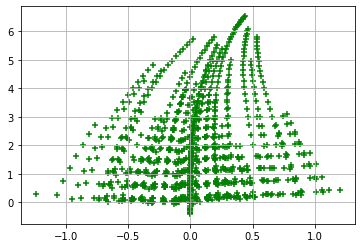

In [8]:
import matplotlib.pyplot as plt
X, Y = Barsnley2(1000)
plt.scatter(X,Y,marker='+', color='g')
plt.grid()
plt.show()

Ahora modifique ```Barsnsley``` tal que los datos generados se guarden en una Barsnsley.txt. 

Define una funcíon ```rotation(theta, vector)``` tal que rote un vector $\vec{v}$ por un ángulo $\theta$. Recordemos que las matrices de rotación son de la forma:

$$ R(\theta) = \begin{pmatrix} 
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{pmatrix}$$

$$R(\theta)\vec{v} = \begin{pmatrix} 
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{pmatrix} \begin{pmatrix} 
x \\
y
\end{pmatrix}= \begin{pmatrix} 
x\cos(\theta) -y\sin(\theta) \\
x\sin(\theta) + y\cos(\theta) 
\end{pmatrix}$$

In [43]:
def rotation(theta, vector):
  v = vector.reshape(2,1)
  return v[0,0]*np.cos(theta)-v[1,0]*np.sin(theta), v[0,0]*np.sin(theta)+v[1,0]*np.cos(theta)

In [44]:
angle = np.pi 
vector = np.array([0,1])
xrot,yrot= rotation(angle,vector)
print(xrot)

-1.2246467991473532e-16


In [45]:
def BarsnleyTxt(n):
  x=0
  y=0
  X = []
  Y = []
  for r in range(n):
    m = randint(1,n)
    coeffs = volado(m)
    mXY = F(np.array([x,y]),coeffs)
    x = mXY[0,0]
    y = mXY[1,0]
    X.append(x)
    Y.append(y)
  file_name = 'BarnsleyOutput.txt'
  with open(file_name,'w') as f:
    f.write("X"+" "+"Y"+"\n")
    for item in range(len(X)):
      f.write(str(X[item])+" "+str(Y[item])+"\n")

In [46]:
BarsnleyTxt(1000)

Ahora sí, por último implemente una función que le aplique una rotación por una ángulo $\theta$ a cada elemneto de Barsnsley.txt y grafique el resultado.

In [50]:
def BarnsleyRot(txtFileName,angle):
    mfile = open(txtFileName,"r")
    lines=mfile.readlines()
    lines = lines[1:]
    Xrot=[]
    Yrot=[]
    for x in lines:
        xe = float(x.split()[0])
        ye = float(x.split()[1])
        xrot,yrot = rotation(angle,np.array([xe,ye]))
        Xrot.append(xrot)
        Yrot.append(yrot)
    mfile.close()
    plt.scatter(Xrot,Yrot,marker='+', color='g')
    plt.grid()
    plt.show()


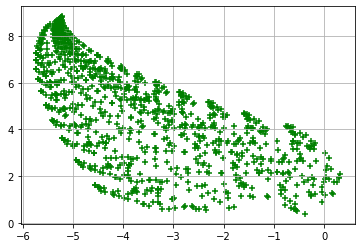

In [57]:
angle = np.pi/4
myfile="BarnsleyOutput.txt"
BarnsleyRot(myfile,angle)